In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [67]:
def standardize(x):
    """Standardize a vector x."""
    return (x - np.mean(x)) / np.std(x)

In [68]:

party_order = [
    'Democratic Unionist Party',
    'Liberal Democrats Party', 
    'Scottish National Party', 
    'Labour Party', 
    'Conservative and Unionist Party', 
]

color_map = {
    'Conservative and Unionist Party': "#0087DC", 
    'Labour Party': "#E4003B",  
    'Liberal Democrats Party': "#FAA61A",
    'Scottish National Party': "yellow", 
    "Democratic Unionist Party": "#D46A4C"
}

marker_map = {
    'Conservative and Unionist Party': "o", 
    'Labour Party': "o",  
    'Liberal Democrats Party': "o",
    'Scottish National Party': "o", 
    "Democratic Unionist Party": "o"
}


# TBIP visualization

In [69]:
ideal_points = np.load("../data/output/uk19-step=50000/ideal_point_loc.npy")

with open("../data/prepro/50wr_24sp_0tp_2016-01-01st_2023-12-30nd/author_map.txt",'r') as f:
    author_map=f.readlines()
author_map = np.array(author_map)

authors = pd.DataFrame({"name": author_map, "ideal_point" :  ideal_points})
authors['name'] = authors['name'].str.replace('\n', '')
authors[['name', 'party']] = authors['name'].str.split(' \(', n=1, expand=True)
authors.loc[:, 'party'] = authors['party'].str.rstrip(')')
authors['std_ideal_point'] = standardize(authors['ideal_point'])

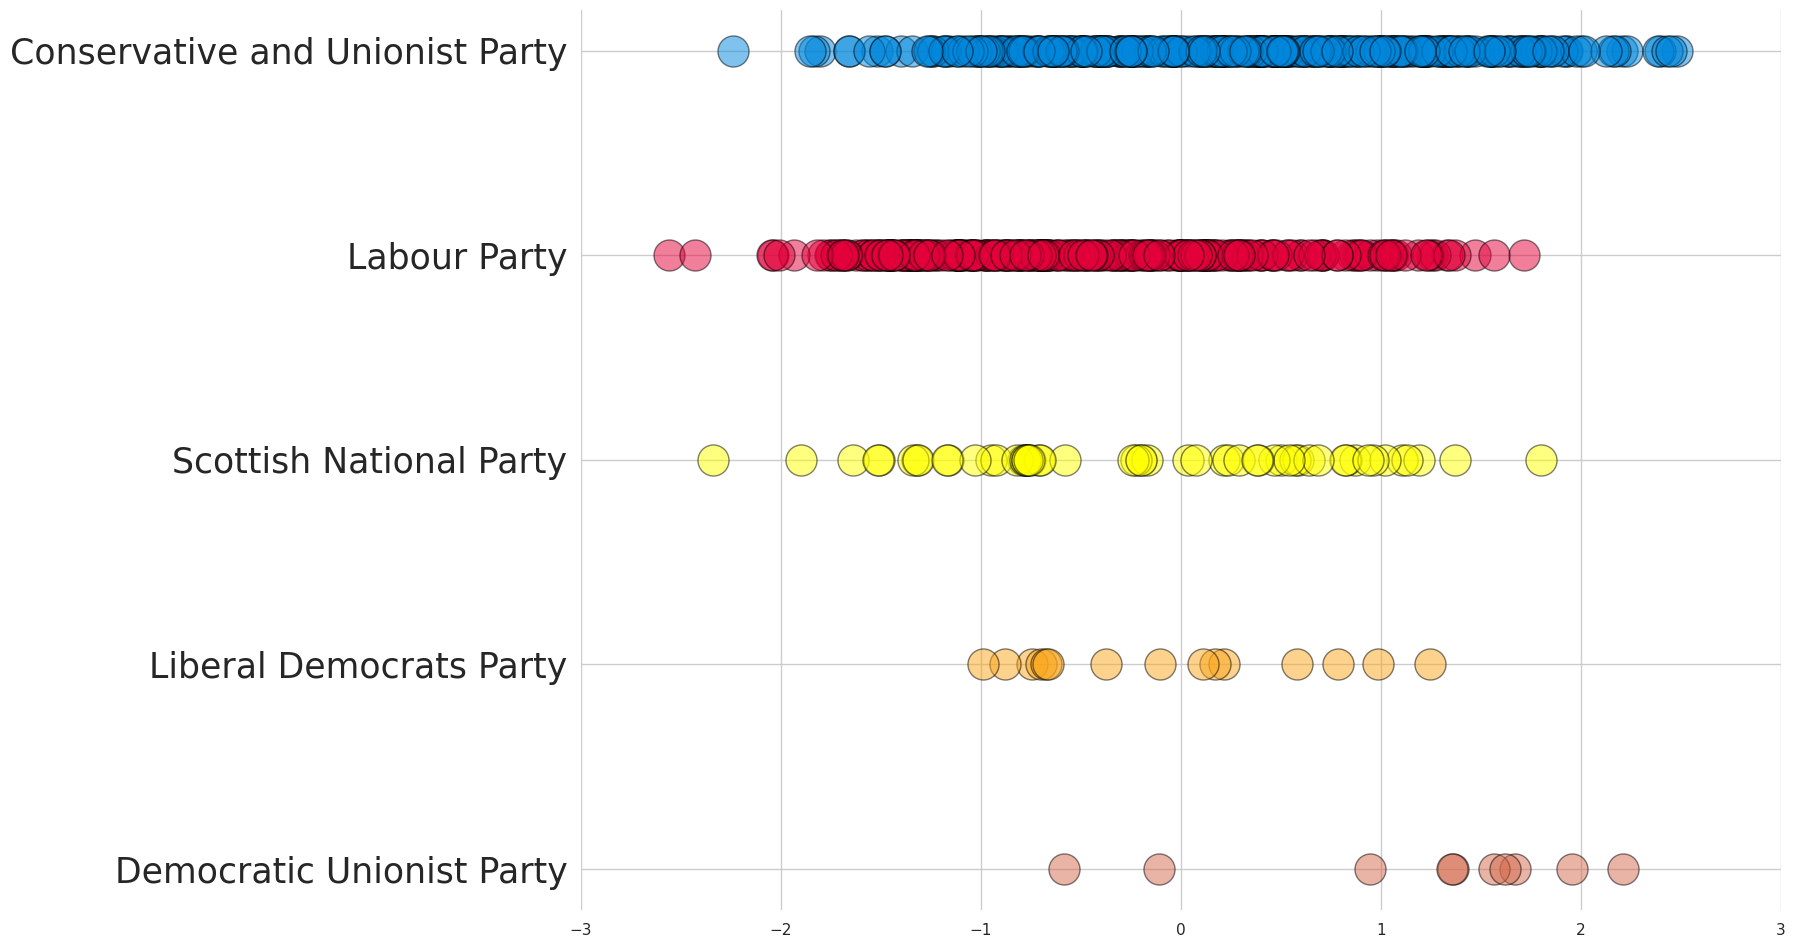

In [70]:
# Replace party names
authors['party'] = authors['party'].replace({
    'Con': 'Conservative and Unionist Party', 
    'Lab': 'Labour Party', 
    'Snp': 'Scottish National Party', 
    'Libdem': 'Liberal Democrats Party', 
    'Dup': 'Democratic Unionist Party'
})
authors['party'] = authors['party'].replace(['Plaidcymru', 'Gpew', "Change Uk", "Sdlp", "Uup"], 'Others')

authors = authors[~authors['party'].isin(['Others', 'Independent'])]

# Plotting
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 6))
ax = plt.axes([0, 0, 1, 1.5], frameon=False)


y_map = {
    party: index * 0.04 - 0.06 for index, party in enumerate(party_order)
}

speech_sizes = np.array([500] * len(authors.party))  # Increased marker size to 50
speech_colors = np.array([color_map[p] for p in authors.party])
speech_markers = np.array([marker_map[p] for p in authors.party])
y = np.array([y_map[p] for p in authors.party])

for _, row in authors.iterrows():
    ax.scatter(row['std_ideal_point'], y_map[row['party']],
               c=color_map[row['party']], marker=marker_map[row['party']], s=500, edgecolor='black', alpha=0.5)

ax.set_yticks(list(y_map.values()))
ax.set_xlim(-3, 3)
ax.set_yticklabels(list(y_map.keys()))
ax.tick_params(axis='y', labelsize=25) 
plt.show()

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

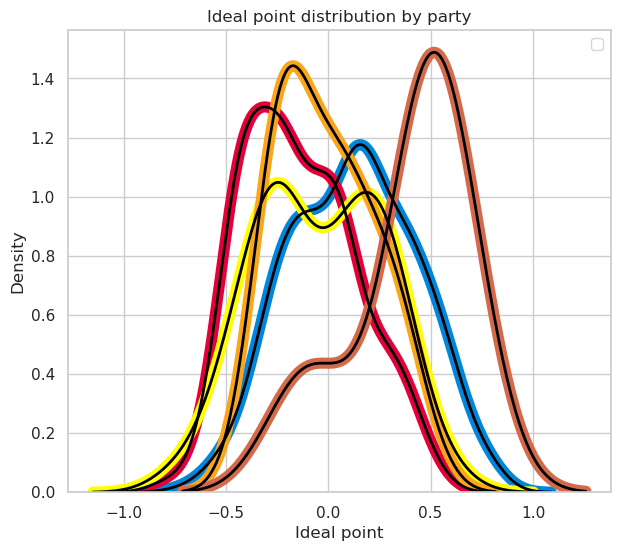

In [71]:

party_order = party_order[::-1]

# Plotting original KDE plots
plt.figure(figsize=(7, 6))
for party in party_order:
    sns.kdeplot(
        authors[authors['party'] == party]['ideal_point'], 
        #label=party, 
        color=color_map[party],
        linewidth=8
    )  
    
# Plotting KDE plots with black outlines
for party in party_order:
    sns.kdeplot(
        authors[authors['party'] == party]['ideal_point'], 
        color='black', 
        linewidth=2
    )  
plt.legend(loc='upper right')
plt.title('Ideal point distribution by party')
plt.xlabel('Ideal point')
plt.ylabel('Density')
plt.show()


# Vote visualization

In [174]:
# from data/votes/input_2019
senator_map = np.loadtxt('../data/votes/input_2019/senator_map.txt', dtype=str, delimiter=',')
# from data/votes/output_2019
ideal_point_loc = np.load('../data/votes/output_2019/ideal_point_loc.npy')
polarity_loc = np.load('../data/votes/output_2019/polarity_loc.npy')
popularity_loc = np.load('../data/votes/output_2019/popularity_loc.npy')

In [175]:
# convert to df
df_ip = pd.DataFrame({'name': senator_map, 'ideal_point': ideal_point_loc})
df_ip[['name', 'party']] = df_ip['name'].str.split(' \(', n=1, expand=True)
df_ip.loc[:, 'party'] = df_ip['party'].str.rstrip(')')

In [176]:
df_ip.loc[df_ip['party']=='Ind', 'party'] = 'Independent'
df_ip.loc[df_ip['party']=='Ld', 'party'] = 'Libdem'
df_ip.loc[df_ip['party']=='Cuk', 'party'] = 'Change Uk'
df_ip.loc[df_ip['party']=='Pc', 'party'] = 'Plaidcymru'
df_ip.loc[df_ip['party']=='Green', 'party'] = 'Gpew'

In [177]:
main_parties = ['Con', 'Lab', 'Snp', 'Libdem', 'Change Uk', 'Plaidcymru', 'Gpew', 'Independent', 'Dup', 'Sdlp', 'Uup']
df_ip= df_ip[df_ip['party'].isin(main_parties)].reset_index(drop=True)
df_ip['std_ideal_point'] = standardize(df_ip['ideal_point'])

In [178]:
df_ip['party'] = df_ip['party'].replace({
    'Con': 'Conservative and Unionist Party', 
    'Lab': 'Labour Party', 
    'Snp': 'Scottish National Party', 
    'Libdem': 'Liberal Democrats Party', 
    'Dup': 'Democratic Unionist Party'
})

df_ip['party'] = df_ip['party'].replace(['Plaidcymru', 'Gpew', "Change Uk", "Sdlp", "Uup"], 'Others')
df_ip = df_ip[~df_ip['party'].isin(['Others', 'Independent'])]
df_ip.reset_index(drop=True, inplace=True)


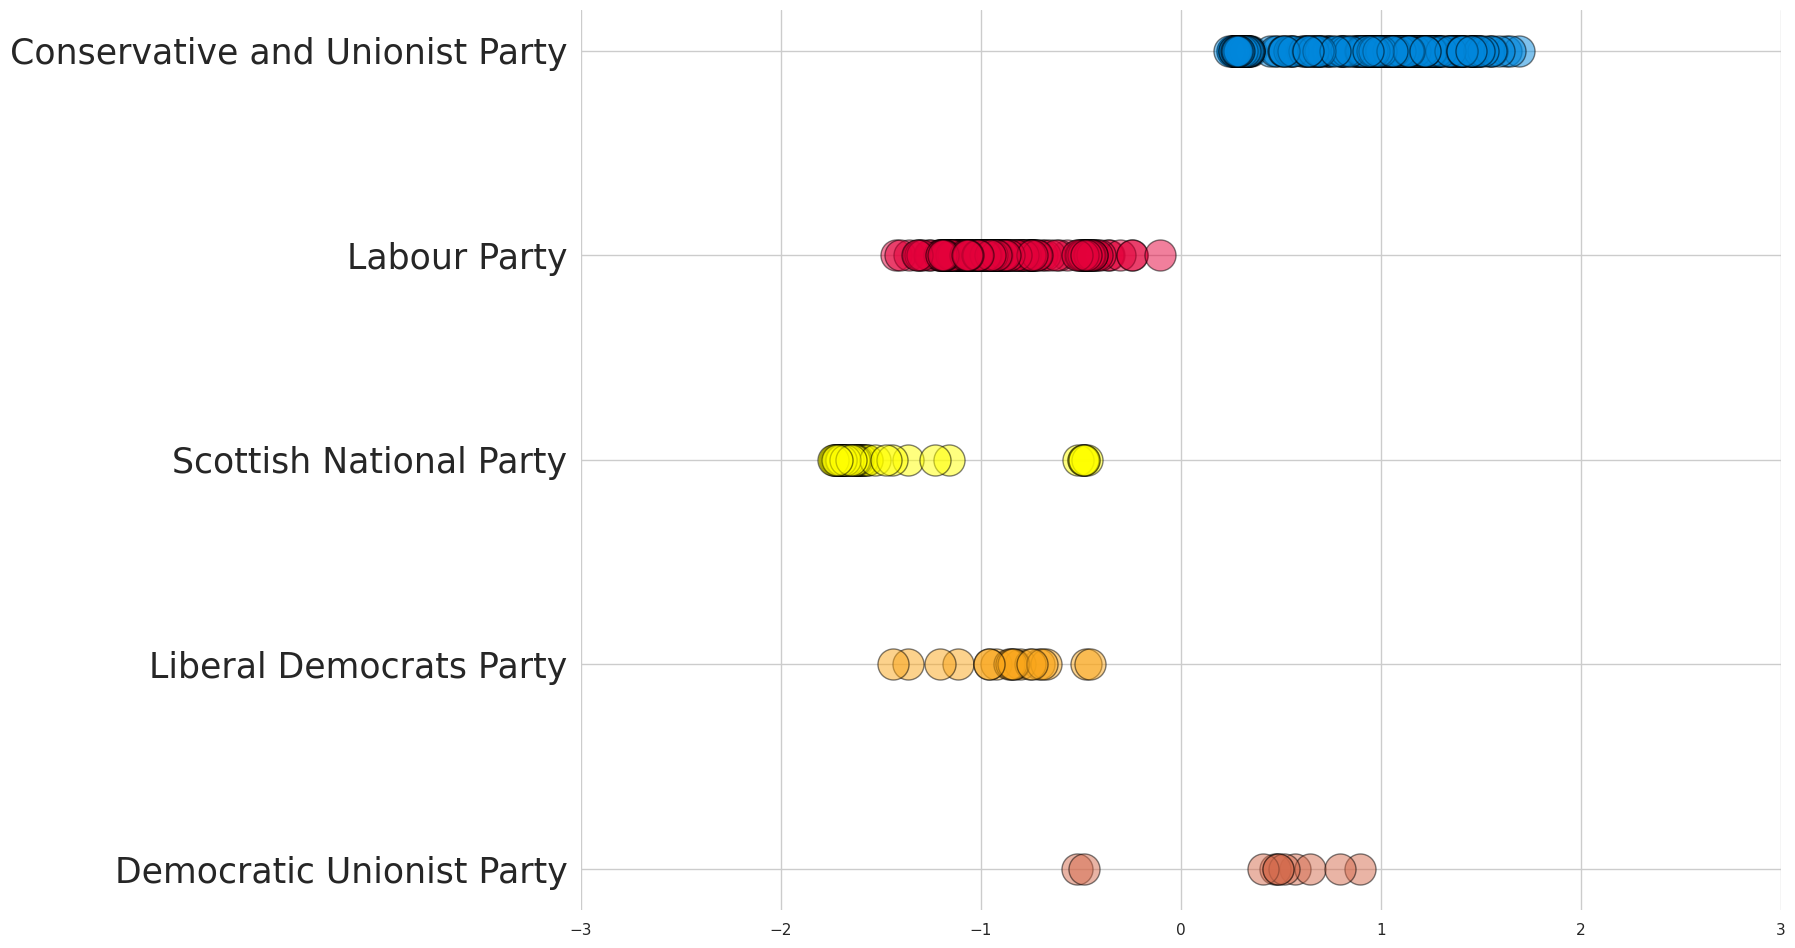

In [77]:

fig = plt.figure(figsize=(12, 6))
ax = plt.axes([0, 0, 1, 1.5], frameon=False)
party_order = party_order[::-1]

y_map = {
    party: index * 0.04 - 0.06 for index, party in enumerate(party_order)
}

speech_sizes = np.array([500] * len(authors.party))

speech_colors = np.array([color_map[p] for p in df_ip.party])
speech_markers = np.array([marker_map[p] for p in df_ip.party])
y = np.array([y_map[p] for p in df_ip.party])

for index in range(len(authors)):
    ax.scatter(df_ip.std_ideal_point[index], y[index],
               c=speech_colors[index], marker=speech_markers[index],s=500, edgecolor='black', alpha=0.5)
ax.set_yticks(list(y_map.values()))
ax.set_yticklabels(list(y_map.keys()))
ax.set_xlim(-3, 3)
#ax.tick_params(axis='x', fontsize=17)  # Set font size for x-axis label
ax.tick_params(axis='y', labelsize=25)  # Set font size for y-axis labels

plt.show()

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

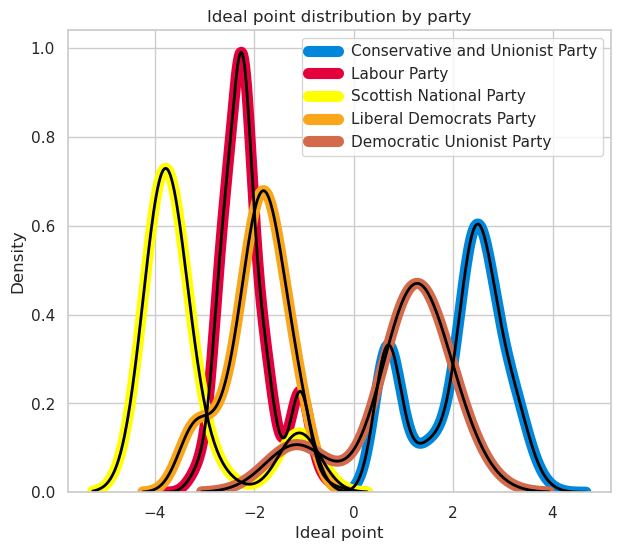

In [78]:
# Plotting original KDE plots
plt.figure(figsize=(7, 6))
party_order = party_order[::-1]

for party in party_order:
    sns.kdeplot(df_ip[df_ip['party'] == party]['ideal_point'], 
                label=party, 
                color=color_map[party],
                linewidth=8)  # Set linewidth to 0 to hide the lines

# Plotting KDE plots with black outlines
for party in party_order:
    sns.kdeplot(df_ip[df_ip['party'] == party]['ideal_point'], 
                color='black',  # Set color to black for outlines
                linewidth=2)   # Increase line width for outlines

plt.legend(loc='upper right')
plt.title('Ideal point distribution by party')
plt.xlabel('Ideal point')
plt.ylabel('Density')
plt.show()


In [191]:
# Define a list of preselected speakers to annotate
df = pd.read_csv('/scratch/dp3766/text-base/ideal-point-texts/data/raw/popularity.csv')
df["Party"] = df["Party"].replace({"Labour": "Lab", "Conservative": "Con"})
df["Name_Party"] = df["Name"] + " (" + df["Party"] + ")"
df["Popularity"] = df["Popularity"].str.rstrip('%').astype(float)
df["Fame"] = df["Fame"].str.rstrip('%').astype(float)
top_10_per_party = df.groupby("Party").apply(lambda x: x.nlargest(5, "Popularity")).reset_index(drop=True)

preselected_speakers = list(top_10_per_party['Name_Party'])

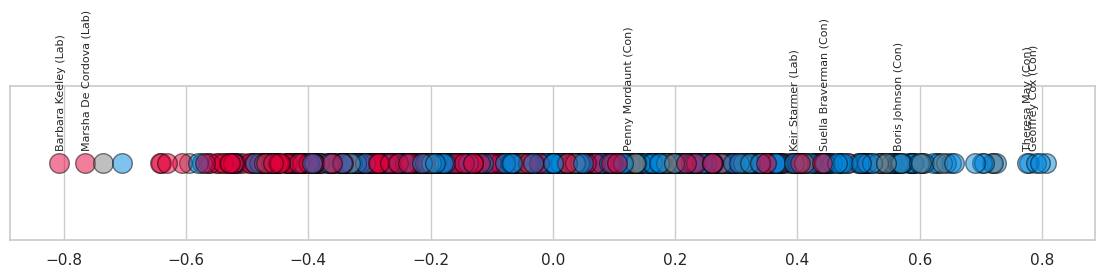

In [221]:
# Load speech author map
with open("../data/prepro/50wr_24sp_0tp_2016-01-01st_2023-12-30nd/author_map.txt",'r') as f:
    speech_author_map = f.readlines()
speech_author_map = np.array(speech_author_map)

# Load speech ideal points
speech_ideal_points = np.load("/scratch/dp3766/text-base/ideal-point-texts/data/output/uk19-step=50000/ideal_point_loc.npy")
standardized_speech_ideal_points = standardize(speech_ideal_points)

# Find the two farthest indices on both ends of the scale
extreme_indices_left = np.argsort(speech_ideal_points)[:2]
extreme_indices_right = np.argsort(speech_ideal_points)[-2:]
extreme_names = [speech_author_map[i].strip() for i in np.concatenate((extreme_indices_left, extreme_indices_right))]

# Create a dictionary to map party names to colors
party_colors = {'Lab)': '#E4003B', 'Con)': '#0087DC'}
# Figure 1: Senate speech ideal points.
sns.set(style="whitegrid")
markers = np.array(["x" if senator[-2] == "R" else "o" for senator in speech_author_map])
sizes = np.array([60 if senator[-2] == "R" else 40 for senator in speech_author_map])

fig, ax = plt.subplots(figsize=(14, 2))

# Iterate through each author and plot their ideal points
for index, author in enumerate(speech_author_map):
    party = author.split("(")[-1].rstrip(")").strip()  # Extract the party information
    color = party_colors.get(party, 'gray')  # Get color from party_colors dictionary
    ax.scatter(speech_ideal_points[index], 0, c=color, marker=markers[index], s=200, edgecolor='black', alpha=0.5)

    # Annotate preselected speakers and the two farthest extremes on both ends of the scale
    if author.strip() in preselected_speakers or author.strip() in extreme_names:
        # Check if there's enough space on the right
        if index < len(speech_author_map) - 1 and speech_ideal_points[index + 1] - speech_ideal_points[index] > 0.02:
            offset = (5, 10)  # Move text to the right
        else:
            offset = (-5, 10)  # Move text to the left
        ax.annotate(author.strip(), (speech_ideal_points[index], 0), xytext=offset, textcoords='offset points', fontsize=8, rotation=90, ha='right')

ax.set_yticks([])
plt.savefig("/scratch/dp3766/text-base/ideal-point-texts/imgs/figure_9.pdf", dpi=300, bbox_inches='tight')
plt.show()



In [193]:


# Create a DataFrame with two columns
df_ = pd.DataFrame({'name_party': speech_author_map, 'text_ideal': speech_ideal_points})
df_[['name', 'party']] =df_['name_party'].str.split('(', expand=True)
df_['name'] = df_['name'].str.strip()

# Remove the trailing whitespace in the 'Party' column
df_['party'] = df_['party'].str.strip(')')
 vdf_ = df_.merge(x, on ='name', how='left')
# Replace party names
df_['party'] = df_['party'].replace({
    'Con)\n': '(Con)', 
    'Lab)\n': "(Lab)"
})


In [204]:
list(df_['Name_Party'])

,name_party,text_ideal,name,party,ideal_point,std_ideal_point,Name_Party
0,Adam Afriyie (Con)\n,0.102740,Adam Afriyie,(Con),2.976526,1.291684,Adam Afriyie (Con)
1,Adam Holloway (Con)\n,0.080039,Adam Holloway,(Con),3.152267,1.367950,Adam Holloway (Con)
2,Adrian Bailey (Lab)\n,0.004397,Adrian Bailey,(Lab),-2.106928,-0.914361,Adrian Bailey (Lab)
3,Afzal Khan (Lab)\n,-0.241288,Afzal Khan,(Lab),-2.468680,-1.071349,Afzal Khan (Lab)
4,Alan Brown (Snp)\n,-0.240820,Alan Brown,Snp)\n,-3.980857,-1.727582,Alan Brown Snp)\n
...,...,...,...,...,...,...,...
745,William Wragg (Con)\n,-0.067605,William Wragg,(Con),2.399898,1.041448,William Wragg (Con)
746,Yasmin Qureshi (Lab)\n,-0.131026,Yasmin Qureshi,(Lab),-2.344806,-1.017592,Yasmin Qureshi (Lab)
747,Yvette Cooper (Lab)\n,0.217468,Yvette Cooper,(Lab),-2.174629,-0.943741,Yvette Cooper (Lab)
748,Yvonne Fovargue (Lab)\n,-0.458730,Yvonne Fovargue,(Lab),-1.871939,-0.812383,Yvonne Fovargue (Lab)


In [218]:
df_["Name_Party"] = df_["name"] + " " + df_["party"]
std_ideal_point =df_['std_ideal_point']


/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


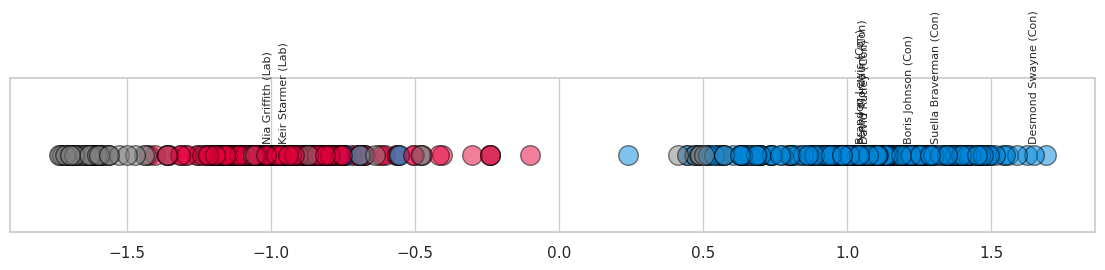

In [220]:
# Find the two farthest indices on both ends of the scale
extreme_indices_left = np.argsort(std_ideal_point)[:2]
extreme_indices_right = np.argsort(std_ideal_point)[-2:]
extreme_names = [speech_author_map[i].strip() for i in np.concatenate((extreme_indices_left, extreme_indices_right))]

# Create a dictionary to map party names to colors
party_colors = {'Lab)': '#E4003B', 'Con)': '#0087DC'}
# Figure 1: Senate speech ideal points.
sns.set(style="whitegrid")
markers = np.array(["x" if senator[-2] == "R" else "o" for senator in speech_author_map])
sizes = np.array([60 if senator[-2] == "R" else 40 for senator in speech_author_map])
party_colors = {'Lab': '#E4003B', 'Con': '#0087DC'}

fig, ax = plt.subplots(figsize=(14, 2))
speech_author_map = np.array(df_.Name_Party)
# Iterate through each author and plot their ideal points
for index, author in enumerate(speech_author_map):
    party = author.split("(")[-1].rstrip(")").strip()  # Extract the party information
    color = party_colors.get(party, 'gray')  # Get color from party_colors dictionary
    ax.scatter(std_ideal_point[index], 0, c=color, marker=markers[index], s=200, edgecolor='black', alpha=0.5)

    # Annotate preselected speakers and the two farthest extremes on both ends of the scale
    if author.strip() in preselected_speakers or author.strip() in extreme_names:
        # Check if there's enough space on the right
        if index < len(speech_author_map) - 1 and std_ideal_point[index + 1] - std_ideal_point[index] > 0.02:
            offset = (5, 10)  # Move text to the right
        else:
            offset = (-5, 10)  # Move text to the left
        ax.annotate(author.strip(), (std_ideal_point[index], 0), xytext=offset, textcoords='offset points', fontsize=8, rotation=90, ha='right')

ax.set_yticks([])
plt.savefig("/scratch/dp3766/text-base/ideal-point-texts/imgs/figure_10.pdf", dpi=300, bbox_inches='tight')
plt.show()



In [199]:
df_[df_['name']=='Suella Braverman']

,name_party,text_ideal,name,party,ideal_point,std_ideal_point,Name_Party
700,Suella Braverman (Con)\n,0.464384,Suella Braverman,(Con),3.103678,1.346864,Suella Braverman (Con)


In [49]:
# topics
import analysis_utils as utils


# Load TBIP data.
data_dir = '../data/prepro/uk-19'
(counts, vocabulary, author_indices, 
 author_map) = utils.load_text_data(data_dir)

# Load TBIP parameters.
param_dir = "../data/output/uk19-step=10000"
(document_loc, document_scale, objective_topic_loc, objective_topic_scale, 
 ideological_topic_loc, ideological_topic_scale, ideal_point_loc, 
 ideal_point_scale) = utils.load_tbip_parameters(param_dir)

# Print topics.
utils.print_topics(objective_topic_loc, 
                   objective_topic_scale,
                   ideological_topic_loc, 
                   ideological_topic_scale, 
                   vocabulary)


['Negative 0: eu, european union, immigration, home, country, issue, united kingdom, prime, rights, europe'
 'Neutral 0: home, country, immigration, refugees, children, eu, british, europe, refugee, migration'
 'Positive 0: home, country, vulnerable, immigration, children, refugees, detention, asylum, refugee, family'
 '=========='
 'Negative 1: parliament, exit, powers, law, clause, european union, withdrawal, eu, legislation, ministers'
 'Neutral 1: legislation, powers, law, act, clause, parliament, new clause, state, rights, place'
 'Positive 1: legislation, act, regulations, ensure, place, powers, law, local authorities, state, important'
 '=========='
 'Negative 2: broadband, united kingdom, point, state, deal, help, digital, european union, communications, mobile'
 'Neutral 2: autism, help, broadband, access, digital, constituency, mobile, autistic, coverage, constituents'
 'Positive 2: autism, autistic, help, access, constituency, broadband, diagnosis, digital, training, spectru